# SAS Explore 2023 - Unlock your data with Python and SAS Viya

This workshop will use the Python SWAT package in SAS Viya to accelerate your data processing using the massively parallel processing environment on the SAS Viya platform with Python. You will learn how to access, explore and analyze data in the distributed CAS server using both familiar Pandas API from the SWAT package and specific SWAT methods (CAS actions).

With the SAS SWAT package you can execute a variety of Pandas API methods and CAS actions to process data on the distributed CAS server:
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

Learn more about the CAS server architecture:
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)


## Simple performance test on 22 million rows of data:
**Local pandas**
- CPU times: total: 5min 31s
- Wall time: 4min 27s

**CAS server**
- CPU times: total: 2.03 s
- Wall time: 36 s



In [21]:
##
## Display image function
##

from IPython.display import Image
def display_image(img):
    ''' Custom function to display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True)

# Introduction to SAS Viya

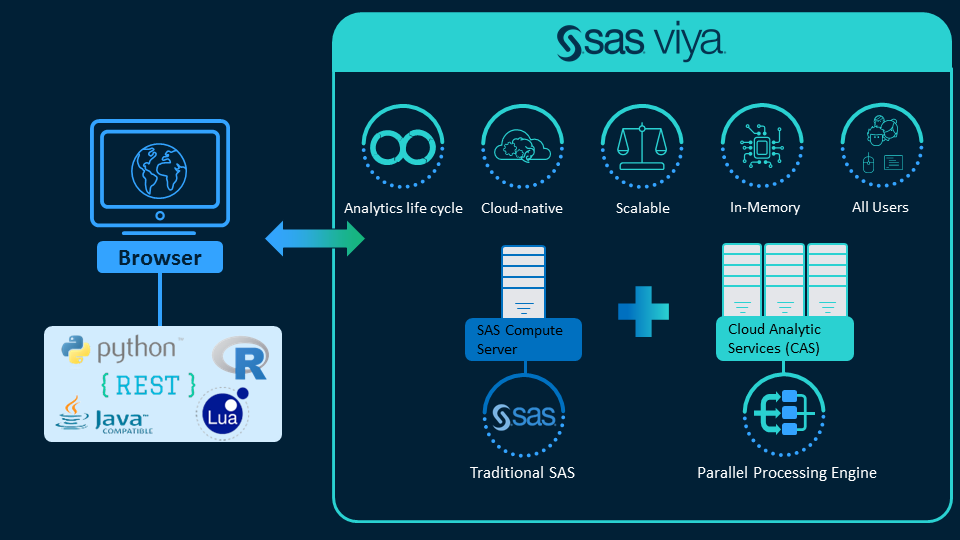

In [2]:
display_image('01_Viya_Overview.png')

**Expand notes below each slide for more information**

SAS Viya contains a variety of applications to process your data through the entirety of the analytics life cycle, but SAS Viya is much more than that. It's also cloud native, allowing scalable, web-based access to quick, accurate, and reliable analytical insights. Its in-memory engine and parallel processing capabilities can significantly improve the execution speed of your analytics. In its entirety, SAS Viya is a collaborative environment for all users. It enables everyone – data scientists, business analysts, developers, report viewers and executives alike – to collaborate, scale, and operationalize insights.

How does all of this happen? SAS Viya includes multiple servers. The SAS Compute Server and SAS Cloud Analytic Services, or the CAS server for short. The SAS Compute Server enables you to execute traditional SAS code. The SAS Compute Server is the Viya equivalent of the SAS®9 workspace server.

Then there’s the CAS server. CAS has a massively parallel processing (MPP) architecture that is appropriate for analyzing big data and resource-intensive programs. It performs parallel processing on resident in-memory data to boost performance and produce lightning-fast results. It is optimal for big data and resource-intensive programs like machine learning. In this course, we focus on working with the CAS server in SAS Viya.

All of these features are accessed from a web browser, and SAS Viya provides integration with open-source languages like Python, R, REST, JAVA, and LUA.

In [ ]:
display_image('02_Viya_Apps.png')

SAS Viya consists of many applications that enable you to work with your data no matter your job role or skill level. This can be done through the collection of integrated AI, analytic, and data management solutions in SAS Viya.

The entry point for SAS Viya is SAS Drive, a collaborative interface for accessing, organizing, and sharing content. This application is the gateway to all other applications in SAS Viya.
SAS Studio is the interactive development environment (IDE) in SAS Viya that enables you to program, build flows, and even use point-and-click tools to process your data.
SAS Visual Analytics enables you to visualize data, build statistical models, and create interactive dashboards with an easy-to-use point-and-click interface.
SAS Data Studio is the data preparation application that enables you to easily prepare data using point-and-click transforms. It also enables you to easily embed custom code if necessary.
SAS Visual Statistics, SAS Visual Data Mining and Machine Learning, and SAS Visual Forecasting are applications built for data scientists. Users can interactively create and refine predictive machine learning models and forecasts.
SAS Model Manager streamlines the model life cycle
SAS Environment Manager manages the entire environment.
These are just a few of the many applications available in SAS Viya. All of these applications enable individuals in an organization to work with data.

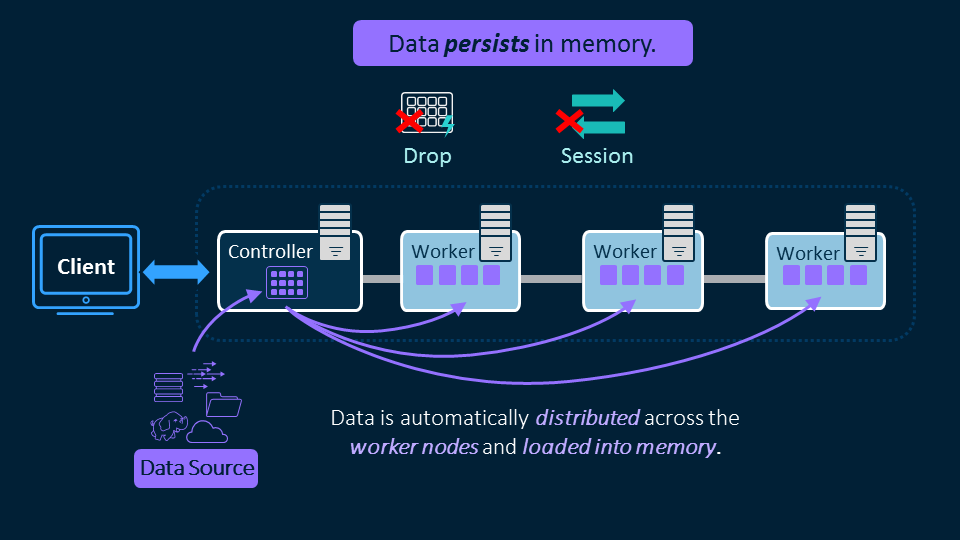

In [8]:
display_image('03_CAS_Overview2.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection.

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casfun/titlepage.htm?fromDefault=)


For data to be processed in CAS, data is copied into memory from some physical storage, and data blocks are automatically distributed across the worker nodes. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends.

SAS Documentation - [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm)

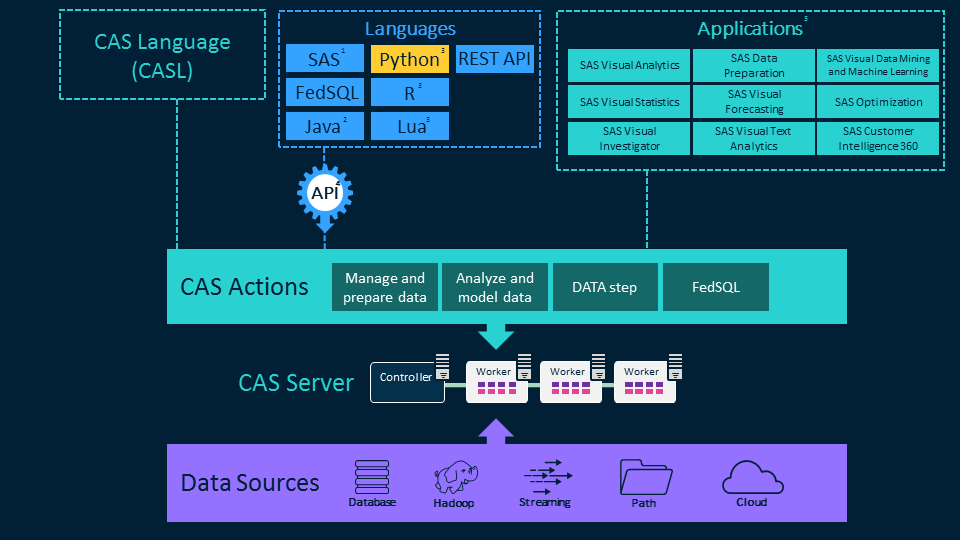

In [9]:
display_image('03_CAS_Overview4.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

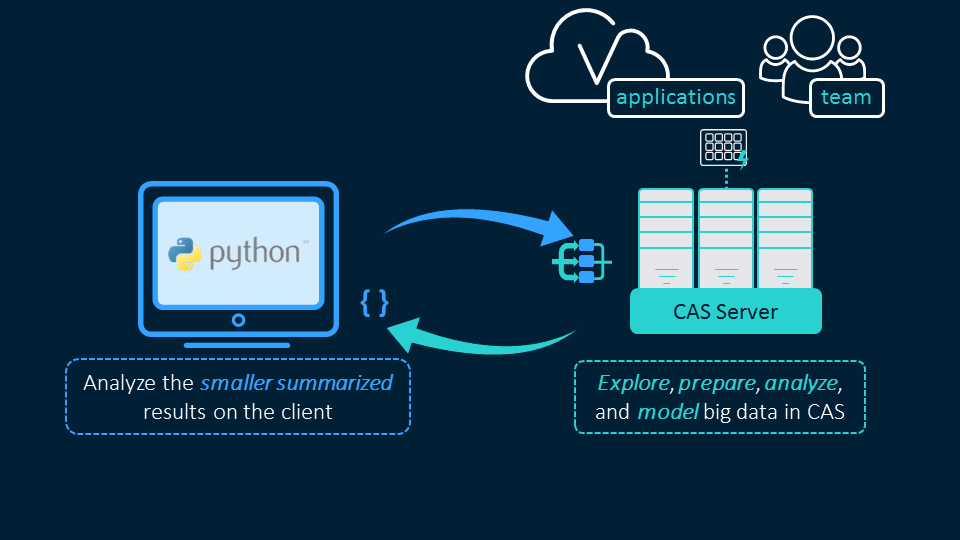

In [10]:
display_image('05_Client_Server.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


# Begin Hands On Workshop

In [2]:
import swat
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## my personal module to connect to CAS
try:
    from casauth import CASAuth
    print('Imported personal custom CAS auth package')
except:
    print('casauth package not available')

print(f'Python version:{sys.version.split("|")[0]}')
print(f'swat version:{swat.__version__}')
print(f'pandas version:{pd.__version__}')
print(f'numpy version:{np.__version__}')

Imported personal custom CAS auth package
Python version:3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
swat version:1.13.0
pandas version:1.5.3
numpy version:1.24.3


## 1. Connect to the CAS Server
**To connect to the CAS server, you need:**
- the host name, 
- the port number, 
- authentication

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

[SWAT Package Authentication Documentation](https://sassoftware.github.io/python-swat/getting-started.html#authentication)

In [3]:
## My personal connection to CAS. You will have your own.

## Connect to CAS
path = os.getenv('HOMEPATH') + '\\.sas'
conn = CASAuth(path, ssl_ca_list = path + '\ssemonthly-rootCA-Intermidiates_4CLI.pem')


######## GENERAL  ACCESS USING BINARY PROTOCOL###################
#cashost ='<CAS_IP>'
#conn = swat.CAS(cashost, casport, '<##user##>', '<##password##>')
#################################################################

######## SAS VIYA ON AZURE MARKETPLACE CONNECTION #################################################
# casport = 5570
# cashost = 'sas-cas-server-default-client'
# conn = swat.CAS(cashost, casport, password=os.environ.get('ACCESS_TOKEN'))
###################################################################################################

######## SAS VIYA FOR LEARNERS CAS CONNECTION INFORMATION ######################################### 
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue,port=portValue,password=passwordToken)
###################################################################################################

CAS Connection created


View the type of the **conn** variable. Notice that it is a CAS connection object.

In [4]:
type(conn)

casauth.casauth.CASAuth

Test the CAS connection and view the SAS Viya version.

In [5]:
conn.about()['About']['Viya Version']

NOTE: Grid node action status report: 5 nodes, 9 total actions executed.


'Stable 2023.05'

## 2. Set up the workshop data (REQUIRED)
The function below will create the data for this demonstration. It will create a file named **retail_sales.parquet** using sample data that comes with SAS Viya. This should run all Viya environments.

In [6]:
def setup_demo_data(datasourcefile, incaslib, outfilename, outcaslib, append_value=30, create_local_file = 'N'):
    '''
    Loads a CAS table into memory and then saves it back to a caslib in the specified file format.
    
    Parameters
    -----------------
    datasourcefile : string
        Specify a server-side data source file to load into memory.
    incaslib : string
        Specify the caslib the data source file is located in.
    outfilename : string (filename.extension)
        Specify the name and extension of the file you want to save the CAS table as.
    outcaslib : string
        Specify what caslib to save the file back to.
    append_value : numeric value
        Appends the table to itself n times
    create_local_file : values Y or N (default N)
        Will create a copy of the CAS table locally and increase the size of it based on the append_value value.
        Setting this to Y will increase the time for the function to execute. Please be patient.
    '''
    
    # Load data into memory abd name it demo_data in the casuser caslib
    conn.loadTable(path = datasourcefile, caslib = incaslib,
                   casout = {'name':'demo_data_raw', 
                             'caslib':'casuser', 
                             'replace':True})
    
    ## Create local file if requested. This can take between 5-10 minutes depending on the size.
    if create_local_file == 'Y':
        castbl = conn.CASTable('demo_data_raw', caslib = 'casuser')
        df = castbl.to_frame()
        pd.concat([df]*append_value).to_parquet('retail_sales.parquet')
        print('created the retail_sales.parquet file in your local directory')
    
    
    ## Duplicate the CAS table in a DATA step
    inputcastbl = 'casuser.demo_data_raw '
    append_n_times = append_value
    
    conn.runCode(code = f'''
        data casuser.demo_data;
            set {inputcastbl * append_n_times + ';'}
        run;
    ''')

    # Save the demo_data CAS table back to disk
    conn.save(table = {'name':'demo_data', 'caslib':'casuser'},
              name = outfilename, caslib = outcaslib, replace=True)
    
    # Drop the demo_data CAS table
    for castbl in ['demo_data', 'demo_data_raw']:
        conn.dropTable(castbl, caslib = 'casuser', quiet = True)

    
## Load demo data
setup_demo_data(datasourcefile='RAND_RETAILDEMO.sashdat', incaslib='samples', 
                outfilename='retail_sales.parquet', outcaslib='casuser')

NOTE: Cloud Analytic Services made the file RAND_RETAILDEMO.sashdat available as table DEMO_DATA_RAW in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file retail_sales.parquet in caslib CASUSER(Peter.Styliadis@sas.com).


## 3. Explore the Available Data on the CAS Server 

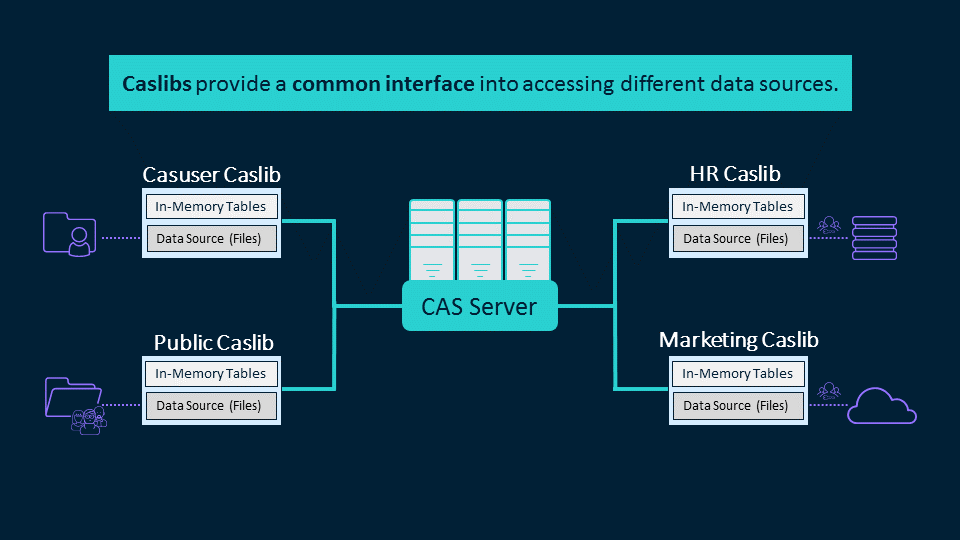

In [69]:
display_image('11a_caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View Available Caslibs
The caslibInfo action will display all available data connections to the CAS server.

In [8]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(Peter.Styliadis@sas.com),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/peter.styli...,,1.0,0.0,1.0,1.0,0.0,1.0
1,cpgretl,PATH,,/cas/data/caslibs/cpgretail/,,1.0,0.0,0.0,0.0,0.0,0.0
2,CPSAppData,PATH,,/cas/data/caslibs/CPSAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
3,EDUPub,PATH,,/cas/data/caslibs/edupub/,,0.0,0.0,0.0,0.0,0.0,0.0
4,EP_CommunityCollege,PATH,,/cas/data/caslibs/educationpractice/EP_Communi...,,0.0,0.0,0.0,0.0,0.0,0.0
5,EP_DOE,PATH,,/cas/data/caslibs/educationpractice/EP_DOE/,,0.0,0.0,0.0,0.0,0.0,0.0
6,EP_Forecasting,PATH,,/cas/data/caslibs/educationpractice/EP_Forecas...,,0.0,0.0,0.0,0.0,0.0,0.0
7,EP_K12,PATH,,/cas/data/caslibs/educationpractice/EP_K12/,,0.0,0.0,0.0,0.0,0.0,0.0
8,EP_SAfE,PATH,,/cas/data/caslibs/educationpractice/EP_SAfE/,,0.0,0.0,0.0,0.0,0.0,0.0
9,EP_Shapes,PATH,,/cas/data/caslibs/educationpractice/EP_Shapes/,,0.0,0.0,0.0,0.0,0.0,0.0


### b. View Available CAS Tables
The [table.tableInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tableinfo.htm) CAS action will display all available in-memory CAS tables.

View available in-memory tables in the **Samples** caslib.

In [9]:
conn.tableInfo(caslib = 'samples')

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,RAND_RETAILDEMO,,930046,40,0,utf-8,2023-06-07T14:35:15+00:00,2023-06-07T14:35:15+00:00,2023-06-15T15:22:03+00:00,UTF8,2.001768e+09,2.001768e+09,2.002462e+09,1,0,0,0,RAND_RETAILDEMO.sashdat,Samples,1,Lalit.Kumar@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
1,PROMO_EFFECTIVENESS_X_EFFECTS_2,promo_effectiveness_x_effects_2,14,11,0,utf-8,2023-06-07T14:35:18+00:00,2023-06-07T14:35:18+00:00,2023-06-15T15:21:55+00:00,UTF8,2.001768e+09,2.001768e+09,2.002462e+09,1,0,0,0,PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat,Samples,1,Lalit.Kumar@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
2,COSTCHANGE,,32,10,0,utf-8,2023-06-16T06:16:10+00:00,2023-06-16T06:16:11+00:00,2023-06-16T06:16:38+00:00,UTF8,2.002515e+09,2.002515e+09,2.002515e+09,1,0,0,0,COSTCHANGE.sashdat,Samples,1,keun-Tae.Kim@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
3,WATER_CLUSTER,,46720,21,0,utf-8,2023-06-16T13:53:32+00:00,2023-06-16T13:53:32+00:00,2023-06-16T15:21:07+00:00,UTF8,2.002543e+09,2.002543e+09,2.002548e+09,1,0,0,0,WATER_CLUSTER.sashdat,Samples,1,Ethan.Kavanaugh@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
4,SW_LAKE_RT_SENSOR_WATERQUALITY,,8228,51,0,utf-8,2023-06-16T13:53:35+00:00,2023-06-16T13:53:35+00:00,2023-06-16T15:21:06+00:00,UTF8,2.002543e+09,2.002543e+09,2.002548e+09,1,0,0,0,SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat,Samples,1,Ethan.Kavanaugh@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09


View available in-memory tables in the **Casuser** caslib.

In [ ]:
conn.tableInfo(caslib = 'casuser')

### c. View Available Data Source Files
The [table.fileInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-fileinfo.htm)  CAS action will display all available files in a caslib.

View available files in the **Samples** caslib.

In [ ]:
conn.fileInfo(caslib = 'samples')

View available files in the **Casuser** caslib.

In [ ]:
conn.fileInfo(caslib = 'casuser')

## 4. Load Data into Memory on the CAS Server (Server-Side)

Use the [table.loadTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm) CAS action to load the **retail_sales.parquet** file into memory in the distributed CAS server. Name the new CAS table **retail_sales** and place it in the **Casuser** caslib.

In [10]:
conn.loadTable(path = 'retail_sales.parquet', caslib = 'casuser',
               casout = {
                   'name':'retail_sales',
                   'caslib':'casuser',
                   'replace':True
               })

NOTE: Cloud Analytic Services made the file retail_sales.parquet available as table RETAIL_SALES in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'RETAIL_SALES'

[casTable]

 CASTable('RETAIL_SALES', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 18.5s, user: 149s, sys: 47.6s, mem: 3.84e+03mb

View available in-memory tables in the **Casuser** caslib. Notice that the **RETAIL_SALES** CAS table is now an in-memory CAS table.

In [11]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,RETAIL_SALES,27901380,40,0,utf-8,2023-06-16T15:55:06+00:00,2023-06-16T15:55:06+00:00,2023-06-16T15:55:06+00:00,UTF8,2.002550e+09,2.002550e+09,2.002550e+09,0,0,0,0,retail_sales.parquet,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,,NaN


## 5. Explore the CAS Table

### a. Reference the CAS table
Create a client-side reference to the CAS table named **castbl**. Then display the value and type of **castbl**. Notice that it is a **CASTable** object and is referencing the **retail_sales** CAS table in the **Casuser** caslib. 

In [12]:
castbl = conn.CASTable('retail_sales', caslib = 'casuser')

display(type(castbl), castbl)

swat.cas.table.CASTable

CASTable('retail_sales', caslib='casuser')

In [ ]:
castbl.head()

Use the tableDetails CAS action to get detailed information about a CAS table. Notice that the CAS table is broken up into blocks for distributed processing.

In [ ]:
castbl.tableDetails()

### b. Preview the CAS Table

You can execute the SWAT head method on a **CASTable** object to return five rows to your Python client. The head method executes in the CAS server, and the CAS server returns five rows to the Python client as a **SASDataFrame** object.

In [ ]:
df = castbl.head()

display(type(df), df)

### c. Basic CAS Table Exploration

View the number of rows and columns in a CAS table using the SWAT shape attribute.

In [ ]:
castbl.shape

You can also use the numRows CAS action for similar results.

In [ ]:
castbl.numRows()

Use the [table.columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-columninfo.htm) CAS table column information.

In [ ]:
castbl.columnInfo()

View the number of missing values in each column using the SWAT nmiss method. This is similar to using the isna and sum methods in pandas. The processing will be completed in the distributed CAS server and a **series** will be returned to the Python client.

In [ ]:
castbl.nmiss()

### d. Explore Categorical Columns

Find the count of unique values in a CAS table using the SWAT package value_counts method. The CAS server summarizes the data and returns a **series** to the Python client.

In [ ]:
(castbl                          ## CAS table
 .age_bucket                     ## CAS table column
 .value_counts(normalize=True)   ## SWAT package value_counts method
)

The SWAT package enables you to summarize your data in the distributed CAS server, then work with the smaller summarized results on the Python client. Here we will plot the **series** returned from the CAS server on the client using the pandas plot method.

In [ ]:
df = (castbl                          ## CAS table
      .age_bucket                     ## CAS table column
      .value_counts(normalize=True)   ## SWAT package value_counts method
)

## Plot the Series on the Python client using Pandas
df.plot(kind='bar', figsize=(8,6));

### e. Explore Numeric Columns

You can view descriptive statistics of a CAS table using the SWAT describe method. Notice that the results are similar to the pandas describe method.

In [ ]:
castbl.describe()

You can also use the [simple.summary](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-summary.htm?fromDefault=) CAS action will return similar results.

In [ ]:
castbl.summary()

### f. Filter CAS Tables

You can use the SWAT query method to query a CAS table. This works similarly to the pandas query method.

In [ ]:
(castbl                            ## CASTable object
 .query('age_bucket = "26-35"')    ## SWAT query method
 .loyalty_card                     ## CAS column
 .value_counts()                   ## SWAT value_counts method
)

### g. Group CAS Tables

You can also aggregate data by groups using the SWAT groupby method.

In [ ]:
(castbl                             ## CASTable object
 .groupby(['Year','age_bucket'])    ## Grouping columns
 .loc[:,['Sales','Cost']]           ## Sepcify the columns to aggregate
 .sum()                             ## Aggregate function
)

### h. Execute SQL in the CAS Server

In [ ]:
## Load the fedSQL action set to execute SQL in CAS.
conn.loadActionSet('fedSQL')

## Store a simple SQL query
myQuery = '''
    select year, 
           age_bucket,
           sum(sales) as Total_Sales,
           sum(cost) as Total_Cost
        from casuser.retail_sales
        group by year, age_bucket
        order by year, age_bucket
'''

## Execute the query in the CAS server
cr = conn.execDirect(query = myQuery)

display(type(cr), cr)

Once the data is summarized by the CAS server and returned to the client, you can process the data locally using familiar packages.

In [ ]:
df = (cr['Result Set']
      .assign(Year = lambda _df: _df.Year.astype('int32'))
      .rename(columns=str.lower)
     )

display(df.head(10))

## Plot the DataFrame using seaborn
ax = sns.barplot(data=df, x='year', y='total_sales', hue='age_bucket')
ax.legend(title='Age Buckets')
ax.set_xlabel('')
ax.set_ylabel('Millions');

## 5. Prepre the CAS Table

Preview the CAS table.

In [ ]:
castbl.head()

### a. Create CAS Table Columns

Create two new columns in the CAS table using the eval method. The eval method takes [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/lefunctionsref/n01f5qrjoh9h4hn1olbdpb5pr2td.htm).

In [13]:
castbl.eval('Profit = Sales - Cost')
castbl.eval("loyalty_card_value = ifc(loyalty_card=0,'No Loyalty Card','Loyalty Card')")

View the **CASTable** object. Notice that the eval method added parameters to the **CASTable** object on how to calculate the columns. The columns will be calculated once an action or method is executed on the object.

In [14]:
castbl.params

{'name': 'retail_sales',
 'caslib': 'casuser',
 'computedvars': ['Profit', 'loyalty_card_value'],
 'computedvarsprogram': "Profit =  Sales - Cost; Profit = Profit; loyalty_card_value =  ifc(loyalty_card=0,'No Loyalty Card','Loyalty Card'); loyalty_card_value = loyalty_card_value; "}

Execute the head method on the CASTable object. Notice that the new columns were created.

In [15]:
castbl.head()

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Storeage,trx_hr_char,trx_dow_new,trx_tod,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,sss,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1,Profit,loyalty_card_value
0,25813901.0,2.0,NaN,0.0,electronics,Pine,GRAND,Internet,gadgets,475.0,8.0,8 PM,SUN,Evening,2009-08-30,08:09:00,2009.0,45.0,15.0,45459.48,29.75,151244.0,Sioux Falls,43.536285,-96.731780,United States,44.0870,-99.0922,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,SD,44.0870,-99.0922,26-35,GRAND,Maple,30.0,No Loyalty Card
1,25813974.0,1.0,NaN,0.0,health,Maple,GRAND,Resale,face,736.0,12.0,4 PM,MON,Afternoon,2010-01-11,01:10:00,2010.0,41.0,11.0,1328884.02,30.03,165122.0,Fort Collins,40.559238,-105.078302,United States,39.4928,-105.1883,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,CO,39.4928,-105.1883,56-65,MODA,Maple,30.0,No Loyalty Card
2,25813979.0,1.0,NaN,0.0,men,Pine,GRAND,Resale,men_underwear,736.0,12.0,10 AM,SUN,Morning,2009-12-13,12:09:00,2009.0,20.0,11.0,415904.64,9.43,165122.0,Naperville,41.749826,-88.155719,United States,41.2340,-88.3961,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,IL,41.2340,-88.3961,56-65,MODA,Maple,9.0,No Loyalty Card
3,25814106.0,1.0,42.0,1.0,health,Maple,GRAND,Resale,medical equipment,736.0,12.0,1 PM,THU,Afternoon,2009-12-03,12:09:00,2009.0,5.0,3.0,1328884.02,2.05,165122.0,New York,40.704234,-73.917927,United States,41.5435,-74.6941,US_AT,40.3,-74.50,US Atlantic Coast,40.3,-74.50,NY,41.5435,-74.6941,36-45,GRAND,Pine,2.0,Loyalty Card
4,25814146.0,2.0,NaN,0.0,health,Maple,GRAND,Resale,hearing,736.0,12.0,9 AM,THU,Morning,2009-09-03,09:09:00,2009.0,0.0,3.0,1328884.02,-3.10,165122.0,Arlington,38.880344,-77.108260,United States,37.6981,-77.8740,US_AT,40.3,-74.50,US Atlantic Coast,40.3,-74.50,VA,37.6981,-77.8740,18-25,FAST,Oak,-3.0,No Loyalty Card


### b. Create a New CAS Table

Create a new CAS table that contains the two new columns from above.

In [16]:
castbl.copyTable(casout={'name':'sales_final', 
                         'caslib':'casuser', 
                         'label':'Final table with two new calculated columns'})

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'SALES_FINAL'

[casTable]

 CASTable('SALES_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 15.3s, user: 66.7s, sys: 74.6s, mem: 7.15e+03mb

View all available in-memory CAS tables. Confirm that the new SALES_FINAL CAS table was created.

In [17]:
conn.tableInfo(caslib = 'casuser')

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,RETAIL_SALES,,27901380,40,0,utf-8,2023-06-16T15:55:06+00:00,2023-06-16T15:55:06+00:00,2023-06-16T15:55:34+00:00,UTF8,2.002550e+09,2.002550e+09,2.002550e+09,0,0,0,0,retail_sales.parquet,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,,NaN
1,SALES_FINAL,Final table with two new calculated columns,27901380,42,0,utf-8,2023-06-16T15:55:35+00:00,2023-06-16T15:55:35+00:00,2023-06-16T15:55:35+00:00,UTF8,2.002550e+09,2.002550e+09,2.002550e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


Reference and preview the new **SALES_FINAL** CAS table.

In [18]:
final_castbl = conn.CASTable('sales_final', caslib = 'casuser')

display(final_castbl, final_castbl.head())

CASTable('sales_final', caslib='casuser')

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Storeage,trx_hr_char,trx_dow_new,trx_tod,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,sss,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1,Profit,loyalty_card_value
0,29555441.0,2.0,NaN,0.0,women,Oak,FAST,Internet,women_Hoodies,985.0,7.0,11 AM,THU,Morning,2009-09-24,09:09:00,2009.0,15.0,17.0,891728.20,-1.71,1256.0,Baltimore,39.307956,-76.617016,United States,39.1513,-76.7954,US_AT,40.3,-74.5,US Atlantic Coast,40.3,-74.5,MD,39.1513,-76.7954,46-55,MODA,Maple,-2.0,No Loyalty Card
1,29555461.0,3.0,NaN,0.0,women,Oak,FAST,Internet,women_Juniors,1147.0,3.0,3 PM,SAT,Afternoon,2009-08-15,08:09:00,2009.0,38.0,10.0,1964080.58,28.15,785.0,Charlotte,35.207193,-80.829224,United States,35.5585,-79.6546,US_CS,35.0,-79.0,US South Central,35.0,-79.0,NC,35.5585,-79.6546,26-35,FAST,Oak,28.0,No Loyalty Card
2,29555514.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_handbags,986.0,2.0,4 PM,FRI,Afternoon,2009-11-27,11:09:00,2009.0,23.0,18.0,1973216.84,4.39,1500.0,Atlanta,33.759506,-84.403176,United States,33.2598,-83.8337,US_SE,30.0,-83.0,US Southeast,30.0,-83.0,GA,33.2598,-83.8337,46-55,MODA,Maple,5.0,No Loyalty Card
3,29555585.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_Pants,1216.0,2.0,11 AM,SUN,Morning,2009-11-15,11:09:00,2009.0,47.0,20.0,5094380.90,27.49,1255.0,Brandon,27.934651,-82.289078,United States,27.8002,-81.6528,US_SE,30.0,-83.0,US Southeast,30.0,-83.0,FL,27.8002,-81.6528,Over 65,FAST,Oak,27.0,No Loyalty Card
4,29555623.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_shorts,1073.0,6.0,2 PM,SAT,Afternoon,2010-01-02,01:10:00,2010.0,150.0,35.0,2170213.56,115.07,1338.0,Oklahoma City,35.482309,-97.534994,United States,35.5895,-96.8641,US_SW,35.0,-106.0,US Southwest,35.0,-106.0,OK,35.5895,-96.8641,Over 65,FAST,Oak,115.0,No Loyalty Card


### c. Save the CAS Table to the Data Source
Save a CAS table to a caslib's data source using the [table.save](https://go.documentation.sas.com/doc/en/pgmsascdc/v_037/caspg/cas-table-save.htm) CAS action. This is simalar to saving a DataFrame back to disk using a to_ method in pandas.

In [19]:
final_castbl.save(name = 'sales_final.parquet', caslib = 'casuser', replace = True)

NOTE: Cloud Analytic Services saved the file sales_final.parquet in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'sales_final.parquet'

+ Elapsed: 1.98s, user: 8.17s, sys: 1.14s, mem: 5.73e+03mb

View the newly saved files in the **Casuser** caslib. Confirm that the **sales_final.parquet** 
was created.

In [20]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-06-05T18:39:35+00:00,2.001610e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,115538808,NONE,2023-05-30T13:52:52+00:00,2.001074e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,warranty_final.csv,43615117,,2023-05-30T13:52:57+00:00,2.001074e+09


## 6. Doing more with the SAS Viya Platform

### a. Machine learning
You can use action sets like the [Regression Action Set](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casactstat/casactstat_regression_toc.htm?fromDefault=) to peform machine learning on the distributed CAS server. This example use the GLM action to fit linear regression models using the method of least squares.

In [19]:
conn.loadActionSet('regression')

target = 'Sales'
inputs = ['Cost', 'mkt_bdgt', 'Margin']

final_castbl.glm(target = target,
                 inputs = inputs)

NOTE: Added action set 'regression'.


[ANOVA]

 Analysis of Variance
 
    RowId           Source          DF            SS            MS        FValue  ProbF
 0  MODEL            Model         3.0  2.822150e+10  9.407168e+09  6.124270e+10    0.0
 1  ERROR            Error  27901376.0  4.285783e+06  1.536047e-01           NaN    NaN
 2  TOTAL  Corrected Total  27901379.0  2.822579e+10           NaN           NaN    NaN

[Dimensions]

 Dimensions
 
       RowId           Description  Value
 0  NEFFECTS     Number of Effects      4
 1    NPARMS  Number of Parameters      4

[FitStatistics]

 Fit Statistics
 
        RowId Description         Value
 0       RMSE    Root MSE  3.919244e-01
 1    RSQUARE    R-Square  9.998482e-01
 2     ADJRSQ    Adj R-Sq  9.998482e-01
 3        AIC         AIC -2.436830e+07
 4       AICC        AICC -2.436830e+07
 5        SBC         SBC -5.226962e+07
 6  TRAIN_ASE         ASE  1.536047e-01

[ModelInfo]

 Model Information
 
          RowId        Description        Value
 0         DATA        Data Source  SALES_FINAL
 1  RESPONSEVAR  Response Variable        Sales

[NObs]

 Number of Observations
 
    RowId                  Description       Value
 0  NREAD  Number of Observations Read  27901380.0
 1  NUSED  Number of Observations Used  27901380.0

[ParameterEstimates]

 Parameter Estimates
 
       Effect  Parameter  DF      Estimate        StdErr         tValue         Probt
 0  Intercept  Intercept   1 -1.278417e-03  1.483977e-04      -8.614799  7.006790e-18
 1       Cost       Cost   1  9.945659e-01  1.024287e-05   97098.377984  0.000000e+00
 2   mkt_bdgt   mkt_bdgt   1  7.645401e-09  6.710510e-11     113.931741  0.000000e+00
 3     Margin     Margin   1  1.000897e+00  2.874842e-06  348157.302987  0.000000e+00

[Timing]

 Task Timing
 
             RowId                  Task      Time   RelTime
 0           SETUP     Setup and Parsing  0.040173  0.110381
 1    LEVELIZATION          Levelization  0.079265  0.217791
 2  INITIALIZATION  Model Initialization  0.002474  0.006798
 3            SSCP      SSCP Computation  0.221091  0.607478
 4         FITTING         Model Fitting  0.010187  0.027991
 5         CLEANUP               Cleanup  0.007673  0.021083
 6           TOTAL                 Total  0.363949  1.000000

+ Elapsed: 0.394s, user: 18.9s, sys: 1.2s, mem: 134mb

### b. Other SAS Viya Applications
You can use other SAS Viya applications like SAS Visual Analytics on the data you prepared using Python.

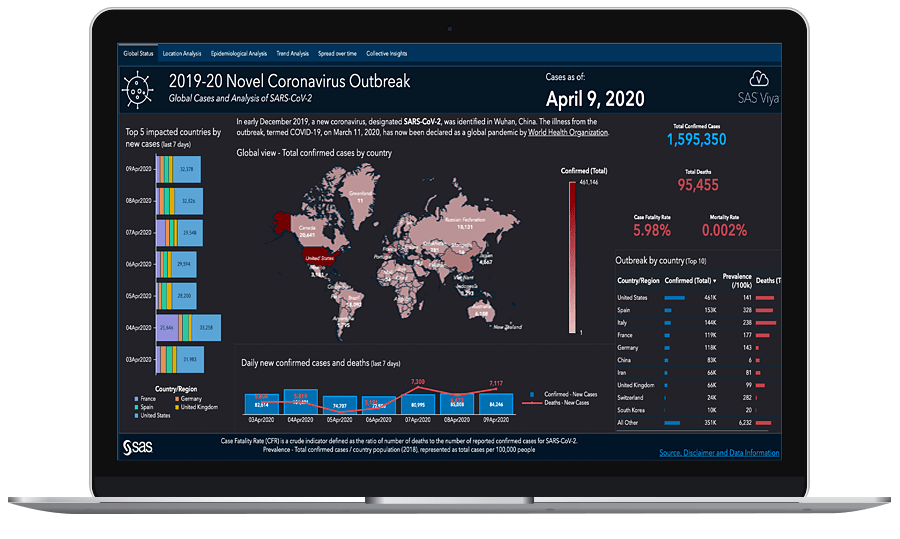

In [49]:
display_image('00_VA_Covid.png')

#### Open SAS Visual Analytics and Access the CAS Table
1. Open a new tab in your browswer
2. Log into SAS Viya
3. At the top left select the **Applications menu** icon
4. Select **Explore and Visualize** to access the SAS Visual Analytics application
5. Then select **Start with Data > Data Sources > cas-shared-default > Casuser**
6. Right click on the **sales_final.parquet** file and select **Load**. This will load the final data into memory.

## 7. Terminate the CAS Connection

Let's delete the files we created in this demo using the [deleteSource](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-deletesource.htm) CAS action.

In [ ]:
delFiles = ['sales_final.parquet', 'retail_sales.parquet']

for file in delFiles:
    conn.deleteSource(source = file, caslib = 'casuser', quiet = True) 

When you are done, it's best practice to terminate your CAS connection.

In [20]:
conn.terminate()

# Additional Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

Additional Resources
- [SAS Viya Quick Start Videos](https://video.sas.com/category/videos/sas-viya-quick-start)
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)



# Thank You for Attending!

## Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS